In [5]:
from scipy.io.wavfile import read,write
from IPython.display import Audio
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import scipy.signal
%matplotlib inline
print ("Modules imported")

Modules imported


In [7]:
#Hanfei Geng hgeng4

In [9]:
#importing wav files
sampling_hum,data_hum = read("with_hum.wav")
sampling_no_hum,data_no_hum = read("without_hum.wav")
#playing files
Audio("with_hum.wav")
#Audio("without_hum.wav")

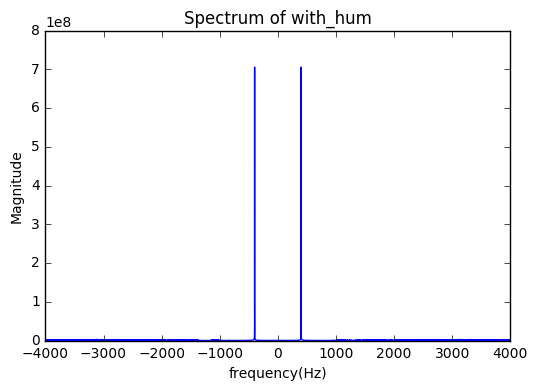

In [10]:
#analysis
#with_hum
%matplotlib inline
size = len(data_hum)
pi = np.pi
HUM = np.fft.fft(data_hum,size)
HUM = np.fft.fftshift(HUM)

w = 2*pi*(np.fft.fftfreq(size))
w = np.fft.fftshift(w)
analog = sampling_hum * w /2/pi

plt.plot(analog,(np.absolute(HUM)))
plt.title("Spectrum of with_hum")
plt.xlabel("frequency(Hz)")
plt.ylabel("Magnitude")

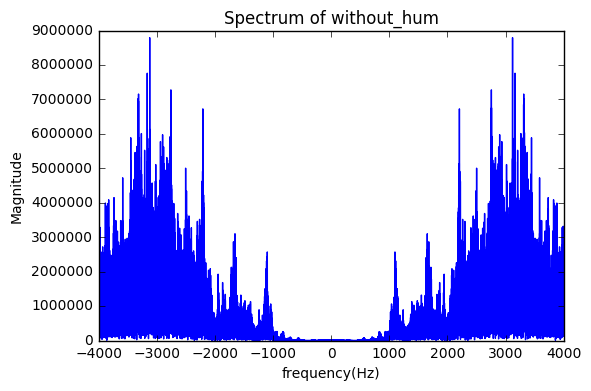

In [35]:
#analysis
#without hum
size_no = len(data_no_hum)
NO_HUM = np.fft.fft(data_no_hum,size_no)
NO_HUM = np.fft.fftshift(NO_HUM)

w_no = 2*pi*(np.fft.fftfreq(size_no))
w_no = np.fft.fftshift(w_no)
analog_no = sampling_no_hum*w_no/2/pi

plt.plot(analog_no,(np.absolute(NO_HUM)))
plt.title("Spectrum of without_hum")
plt.xlabel("frequency(Hz)")
plt.ylabel("Magnitude")

In [36]:
'''
filter design rationale:
Noise occurs at 400Hz with magnitude of 180dB. 
Spectrum without noise has magnitude about 60dB
Thus bandstop's stopband needs to be centered at 400Hz
and magnitude response needs to be around -100dB

Thus order 4 is chosen. Same result count be achieved with butterworh filter of order 3
However, it will not have a sprectrum as good as that produced by order 4 
'''

"\nfilter design rationale:\nNoise occurs at 400Hz with magnitude of 180dB. \nSpectrum without noise has magnitude about 60dB\nThus bandstop's stopband needs to be centered at 400Hz\nand magnitude response needs to be around -100dB\n\nThus order 4 is chosen. Same result count be achieved with butterworh filter of order 3\nHowever, it will not have a sprectrum as good as that produced by order 4 \n"

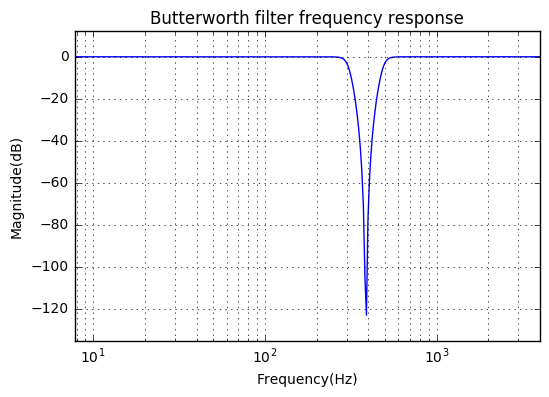

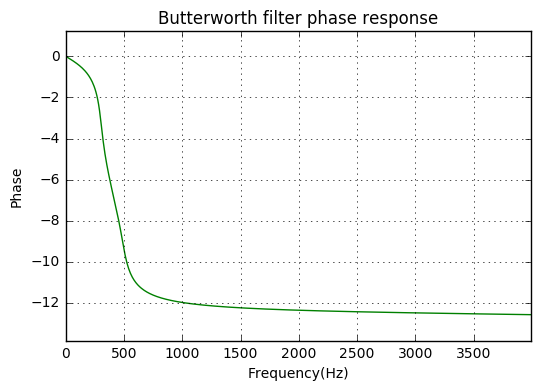

In [37]:
#filter design
nyq = 0.5*sampling_hum
fstart = 300
fend = 500
order = 4

b,a = scipy.signal.butter(order,[fstart/nyq,fend/nyq],btype = 'bandstop',analog = False)
w,h = scipy.signal.freqz(b,a)
plt.semilogx(w*sampling_hum/2/pi, 20 * np.log10(abs(h)))
plt.title("Butterworth filter frequency response")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

plt.figure()

angle = np.unwrap(np.angle(h))
plt.plot(w*sampling_hum/2/pi,angle,'g')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.title("Butterworth filter phase response")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Phase")

In [38]:
# filter the signal
y = scipy.signal.lfilter(b, a, data_hum).astype('int16')

In [39]:
write("wi.wav",data = y,rate = 8000)
Audio("wi.wav")

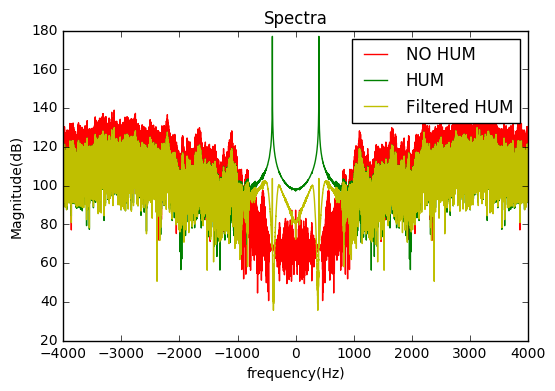

In [40]:
size_n = len(y)
N_HUM = np.fft.fft(y,size_n)
N_HUM = np.fft.fftshift(N_HUM)

w_n = 2*pi*(np.fft.fftfreq(size_no))
w_n = np.fft.fftshift(w_n)
analog_n = sampling_no_hum*w_n/2/pi

plt.plot(analog_no,20*np.log10(np.absolute(NO_HUM)),'r',label = "NO HUM")
plt.plot(analog,20*np.log10(np.absolute(HUM)),'g',label = "HUM")
plt.plot(analog_n,20*np.log10(np.absolute(N_HUM)),'y',label = "Filtered HUM")

plt.title("Spectra")
plt.xlabel("frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.legend()